In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler,normalize
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

# CC GENERAL 마케팅 전략
- kmeans, DBSCAN
- k값 변경
- 고객층 분류 -> 특징 이해 -> 세부적인 마케팅
- 분석

In [92]:
df=pd.read_csv("CC GENERAL.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [93]:
# CUST_ID는 클러스터링에 필요없을 듯하여 제거
df.drop("CUST_ID", axis=1, inplace=True)

In [94]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [95]:
# 결측값 확인
df.isnull().sum()
# CREDIT_LIMIT          1
# MINIMUM_PAYMENTS    313
# MINIMUM_PAYMENTS와 CREDIT_LIMIT의 결측값은 특정 고객의 신용한도가 없기 때문에 발생한 듯하다.
# 따라서 결측값을 0으로 채운다.
df=df.fillna(0)

In [96]:
# k-means clustering

In [97]:
# 표준화/정규화
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 
norm_df = normalize(scaled_df)

In [98]:
# 데이터의 차원을 줄이기 위해 PCA를 사용해보았습니다. 17차원 -> n차원으로 축소 
pca = PCA()
pca.fit(norm_df)

PCA()

Text(0, 0.5, 'cumulative explained variance')

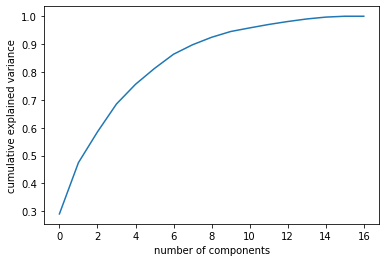

In [99]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [100]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29044997, 0.47452947, 0.58490237, 0.68505818, 0.75571567,
       0.8127604 , 0.86368729, 0.89770753, 0.92447857, 0.94517107,
       0.95813186, 0.97045662, 0.9810481 , 0.99022739, 0.99688251,
       0.9999988 , 1.        ])

In [101]:
n_components=2  # 여기서 n은 구성요소의 수
pca_final = PCA(n_components=n_components)
pca_final.fit(norm_df)
pca_df = pca_final.fit_transform(norm_df)

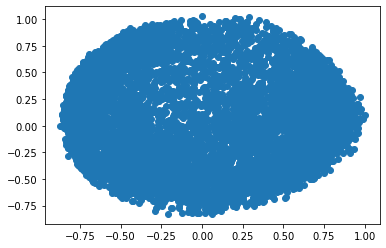

In [102]:
plt.scatter(pca_df[:,0], pca_df[:,1])

In [103]:
for i in np.arange(n_components):
    index =  np.argmax(np.absolute(pca_final.get_covariance()[i]))
    max_cov = pca_final.get_covariance()[i][index]
    column = df.columns[index]
    print("Principal Component", i+1, "maximum covariance :", "{:.2f}".format(max_cov), "from column", column)
# 데이터분석을 위해 구글링하여 찾아보았습니다

Principal Component 1 maximum covariance : 0.06 from column BALANCE
Principal Component 2 maximum covariance : 0.04 from column BALANCE_FREQUENCY


In [104]:
# 첫 번째 주성분의 경우 BALANCE 열에 가장 많은 공분산이 있습니다. 첫 번째 주성분은 BALANCE를 대표한다고 생각할 수 있습니다. 
# BALANCE는 구매를 위해 고객의 계정에 남아 있는 잔액을 나타냅니다.
# 두 번째 주성분의 경우 BALANCE_FREQUENCY 열에 가장 많은 공분산이 있습니다. 
# BALANCE_FREQUENCY는 고객의 잔액이 업데이트되는 빈도를 알려줍니다.
# 즉, 잔액과 잔액이 업데이트되는 빈도수에 대해 클러스터링

In [106]:
ssd = []
n_clust = np.arange(2,11)

for k in n_clust:
    km = KMeans(n_clusters=k, random_state=20221107)
    km.fit(pca_df)
    ssd.append(km.inertia_)

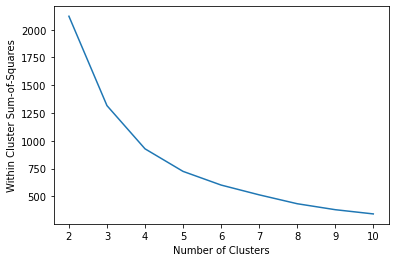

In [107]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum-of-Squares")
plt.show()
# k=3일 때 적절한 것으로 보입니다

In [108]:
# k=3으로 클러스터링
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=0)

In [116]:
pca_df[:,0]

array([-0.49075763, -0.51846288,  0.33093925, ...,  0.18862104,
       -0.31330395,  0.01279805])

In [117]:
pca_df

array([[-0.49075763, -0.6790414 ],
       [-0.51846288,  0.54535502],
       [ 0.33093925,  0.26907071],
       ...,
       [ 0.18862104, -0.24868666],
       [-0.31330395, -0.17139043],
       [ 0.01279805,  0.09720375]])

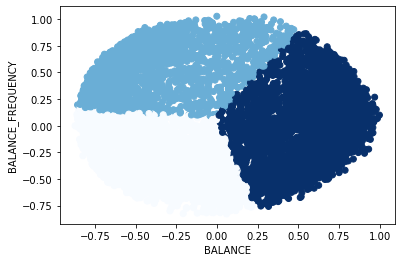

In [118]:
plt.scatter(pca_df[:,0], pca_df[:,1],  # array로 된 pca_df 나누기
            c = KMeans(n_clusters = 3).fit_predict(pca_df),
            cmap = plt.cm.Blues)
plt.xlabel("BALANCE")
plt.ylabel("BALANCE_FREQUENCY")

plt.show() 

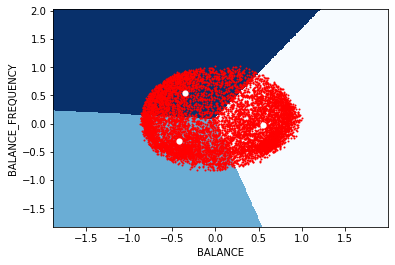

In [119]:
h = .01

x_min, x_max = pca_df[:,0].min() - 1, pca_df[:,0].max() + 1
y_min, y_max = pca_df[:,1].min() - 1, pca_df[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.array(list(zip(xx.ravel(), yy.ravel()))))

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Blues,
           aspect='auto', origin='lower')

plt.plot(pca_df[:,0], pca_df[:,1], 'r.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=10, linewidths=3,
            color='w', zorder=10)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xlabel("BALANCE")
plt.ylabel("BALANCE_FREQUENCY")

plt.show()
# 이제 결정 경계가 훨씬 더 명확해졌고 식별된 3개의 클러스터의 중심도 보입니다. 

In [111]:
for i in np.arange(len(centroids)):
    print("Center of Cluster", i+1, ":", centroids[i])

Center of Cluster 1 : [ 0.5469784  -0.02942559]
Center of Cluster 2 : [-0.41939929 -0.31138371]
Center of Cluster 3 : [-0.35166232  0.54213869]


In [113]:
# 위에서 고객의 잔액과 잔액이 업데이트되는 빈도수에 대해 그룹화
# Cluster 1(white)  
# :클러스터 중심은 (0.54, -0.03)에 있습니다. 이 클러스터는 잔액이 상대적으로 높고 클러스터 2의 고객보다 더 자주 업데이트되는 고객을 나타냅니다.
# Cluster 2(light blue) 
# :클러스터 중심은 (-0.42, -0.31)에 있습니다. 이 클러스터는 잔액이 상대적으로 낮고 업데이트 빈도가 낮은 고객을 나타냅니다.
# Cluster 3(dark blue)      
# :클러스터 중심은 (-0.35, 0.54)에 있습니다. 이 클러스터는 잔액이 상대적으로 낮지만(클러스터 2의 고객 잔액에 매우 가깝지만) 잔액이 매우 자주 업데이트되는 고객을 나타냅니다. 
#  이 클러스터의 고객은 가장 자주 업데이트되는 잔액을 가지고 있는것으로 보입니다.

In [ ]:
# 마케팅

In [122]:
data=pd.read_csv("CC GENERAL.csv")
# 결측값 채우기
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].mean()
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=data['CREDIT_LIMIT'].mean()

columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

# outlier를 완전히 제거하면 너무 많은 데이터가 소실될것같아서 범위를 지정해주었습니다.
for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=500)),Range]=1
    data.loc[((data[c]>500)&(data[c]<=1000)),Range]=2
    data.loc[((data[c]>1000)&(data[c]<=3000)),Range]=3
    data.loc[((data[c]>3000)&(data[c]<=5000)),Range]=4
    data.loc[((data[c]>5000)&(data[c]<=10000)),Range]=5
    data.loc[((data[c]>10000)),Range]=6
 

columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=0.1)),Range]=1
    data.loc[((data[c]>0.1)&(data[c]<=0.2)),Range]=2
    data.loc[((data[c]>0.2)&(data[c]<=0.3)),Range]=3
    data.loc[((data[c]>0.3)&(data[c]<=0.4)),Range]=4
    data.loc[((data[c]>0.4)&(data[c]<=0.5)),Range]=5
    data.loc[((data[c]>0.5)&(data[c]<=0.6)),Range]=6
    data.loc[((data[c]>0.6)&(data[c]<=0.7)),Range]=7
    data.loc[((data[c]>0.7)&(data[c]<=0.8)),Range]=8
    data.loc[((data[c]>0.8)&(data[c]<=0.9)),Range]=9
    data.loc[((data[c]>0.9)&(data[c]<=1.0)),Range]=10
    
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=5)),Range]=1
    data.loc[((data[c]>5)&(data[c]<=10)),Range]=2
    data.loc[((data[c]>10)&(data[c]<=15)),Range]=3
    data.loc[((data[c]>15)&(data[c]<=20)),Range]=4
    data.loc[((data[c]>20)&(data[c]<=30)),Range]=5
    data.loc[((data[c]>30)&(data[c]<=50)),Range]=6
    data.loc[((data[c]>50)&(data[c]<=100)),Range]=7
    data.loc[((data[c]>100)),Range]=8
data.drop(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

X= np.asarray(data)

In [123]:
# 표준화
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8950, 17)

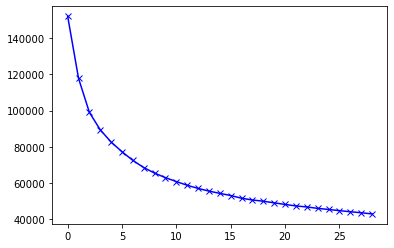

In [131]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)  
plt.plot(cost, 'bx-')
# k=6을 선택, 6그룹으로 군집화

In [126]:
kmean= KMeans(6)
kmean.fit(X)
labels=kmean.labels_
clusters=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0,2
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1,1
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0,4
3,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1,2
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0,2


In [135]:
data.columns

Index(['TENURE', 'BALANCE_RANGE', 'PURCHASES_RANGE', 'ONEOFF_PURCHASES_RANGE',
       'INSTALLMENTS_PURCHASES_RANGE', 'CASH_ADVANCE_RANGE',
       'CREDIT_LIMIT_RANGE', 'PAYMENTS_RANGE', 'MINIMUM_PAYMENTS_RANGE',
       'BALANCE_FREQUENCY_RANGE', 'PURCHASES_FREQUENCY_RANGE',
       'ONEOFF_PURCHASES_FREQUENCY_RANGE',
       'PURCHASES_INSTALLMENTS_FREQUENCY_RANGE',
       'CASH_ADVANCE_FREQUENCY_RANGE', 'PRC_FULL_PAYMENT_RANGE',
       'PURCHASES_TRX_RANGE', 'CASH_ADVANCE_TRX_RANGE'],
      dtype='object')

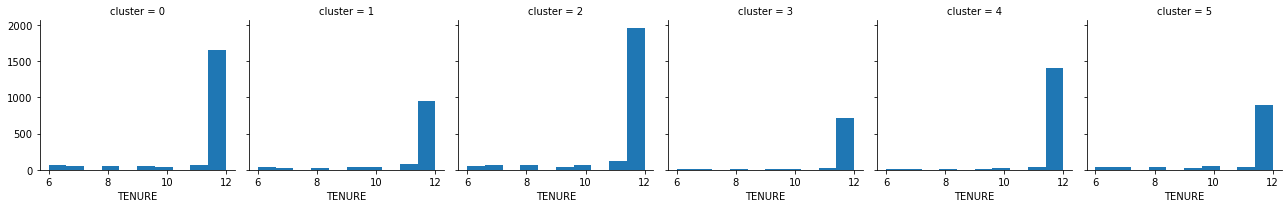

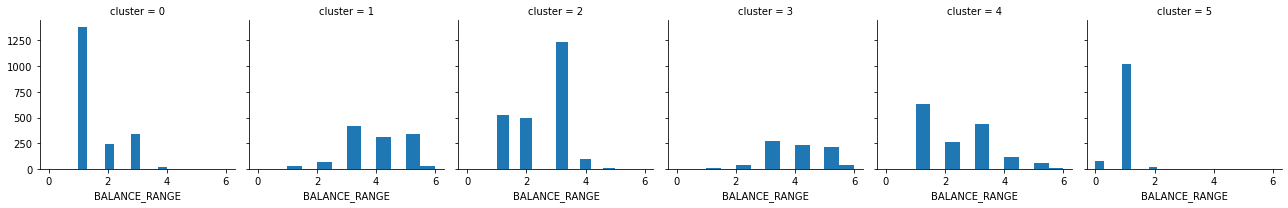

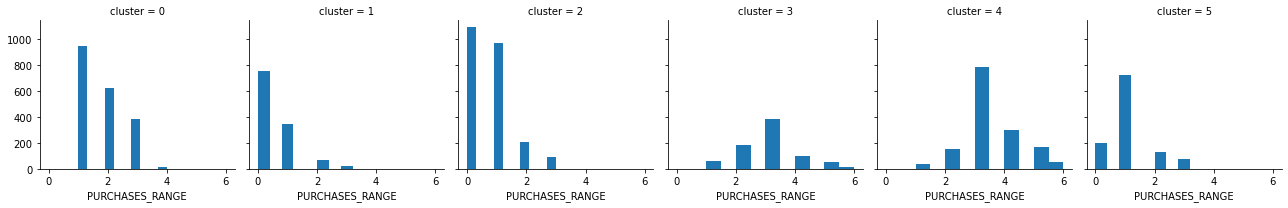

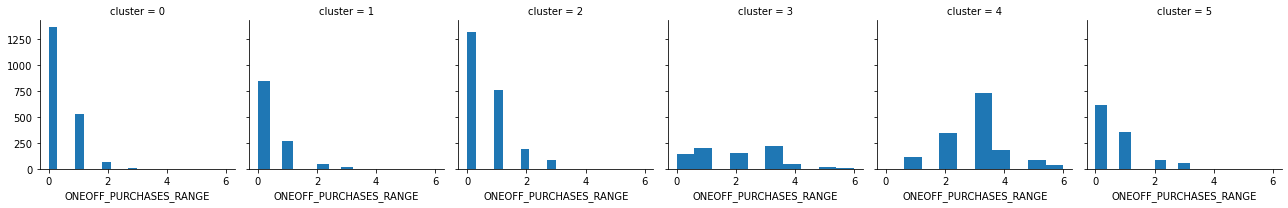

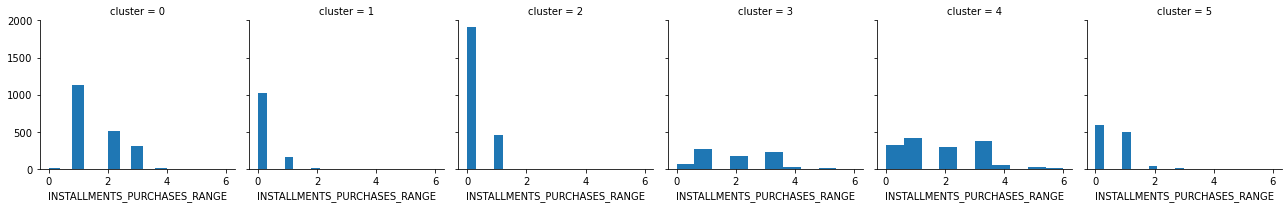

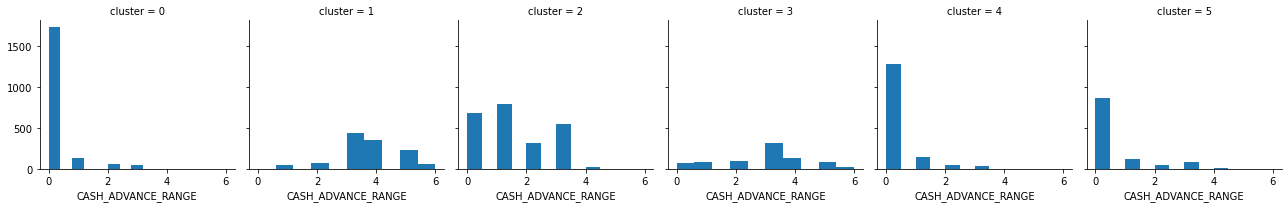

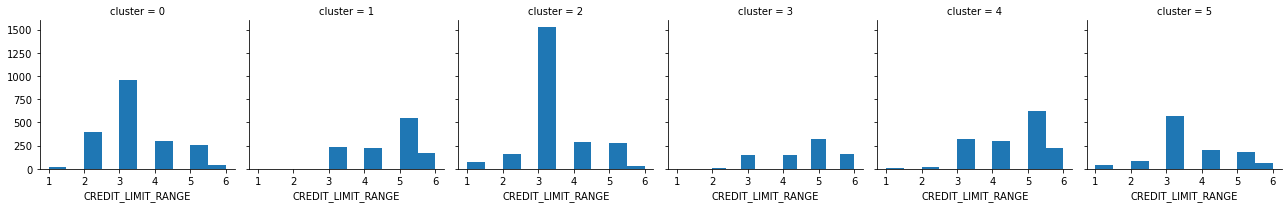

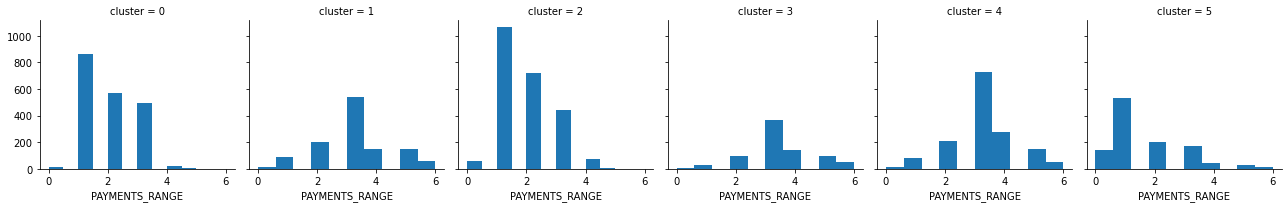

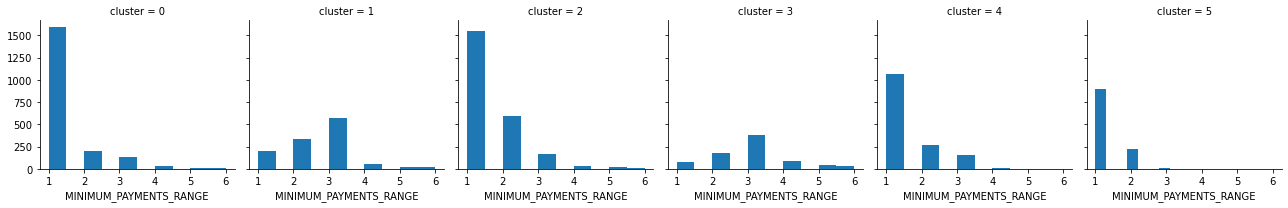

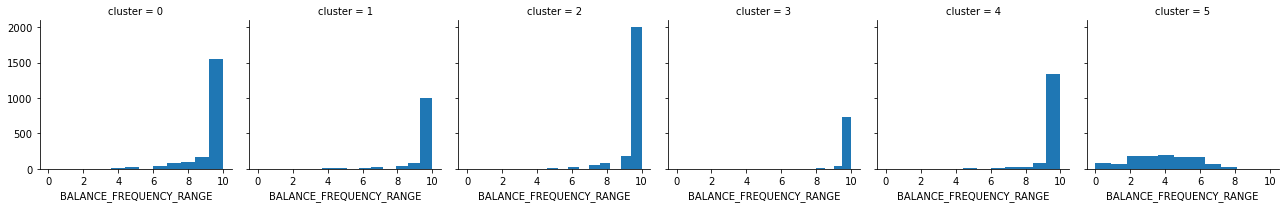

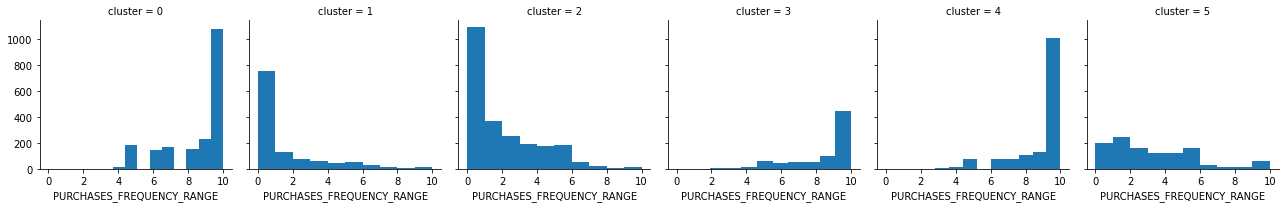

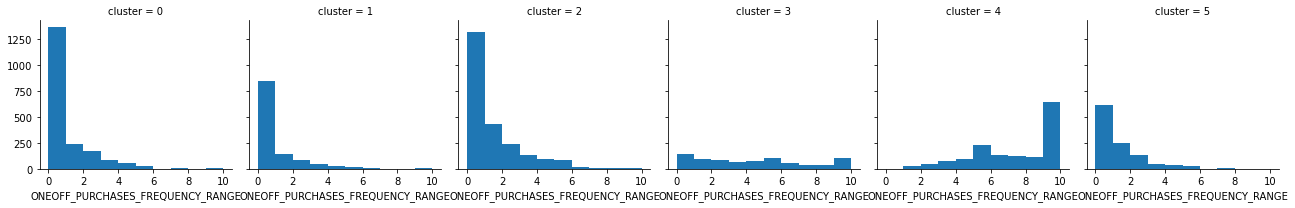

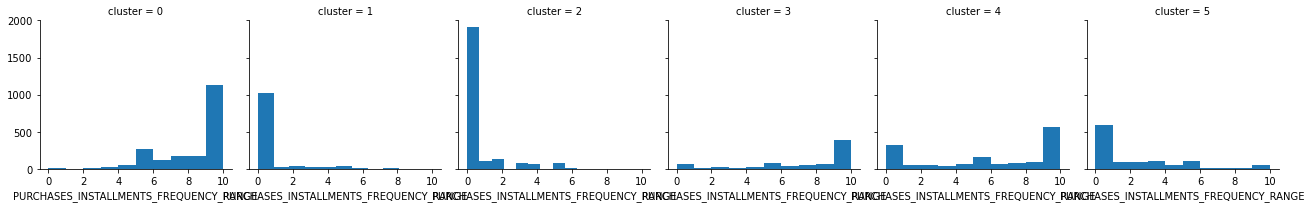

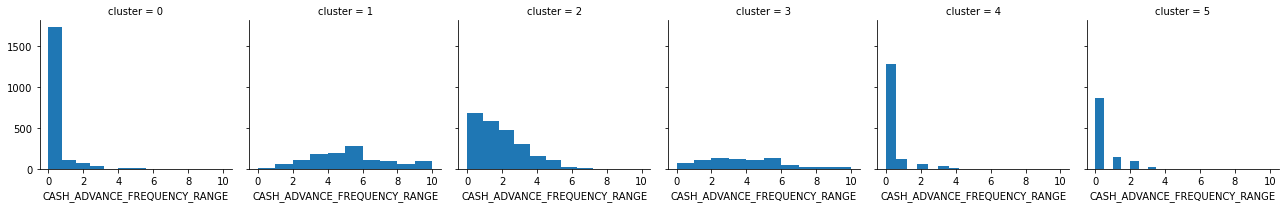

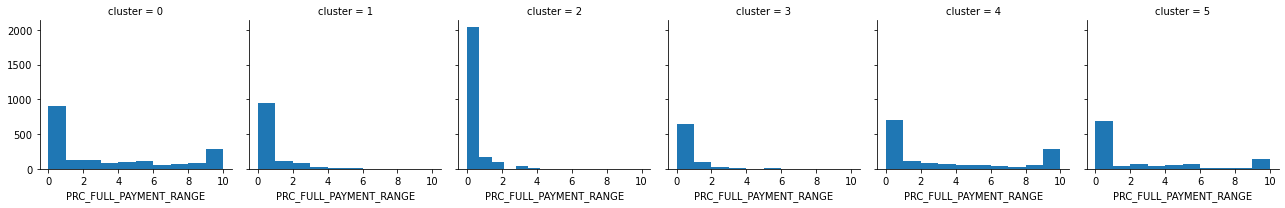

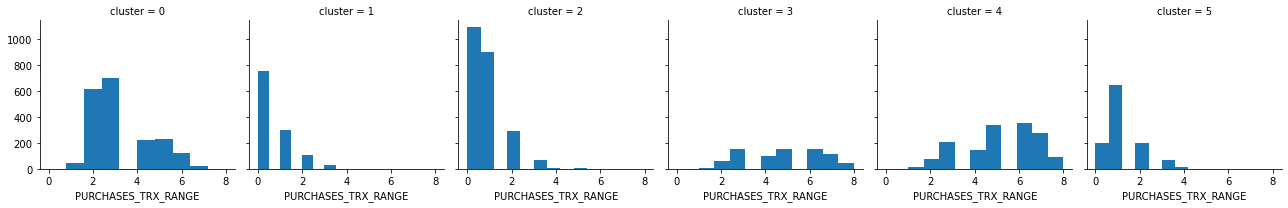

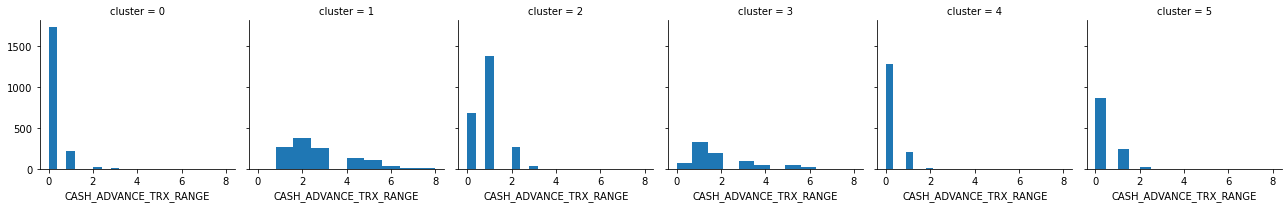

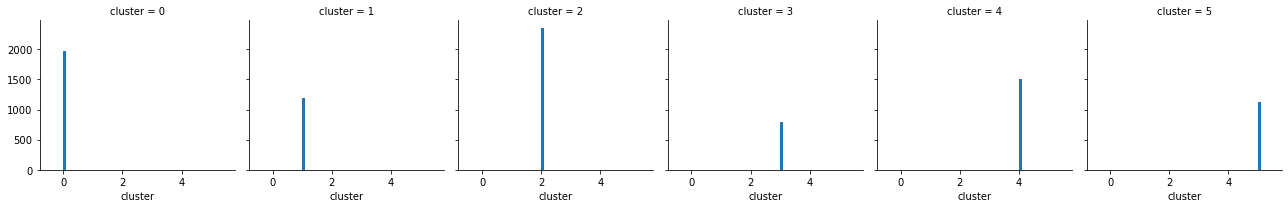

In [127]:
# 그룹별 히스토그램
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

# Cluster0: 고가의 구매를 하는 신용 한도가 높은 고소비자 그룹
# Cluster1: 이 그룹은 선불 현금을 더 자주 받는 그룹
# Cluster2: 돈을 많이 쓰지 않고 신용 한도가 평균 이상인 그룹
# Cluster3: 모든 유형의 구매를 하는 평균에서 높은 신용 한도를 가진 그룹
# Cluster4: 신용 한도가 높은 사람, 사전에 현금을 더 많이 가져가는 그룹
# Cluster5: 대부분 할부로 구매하는 평균에서 높은 신용 한도까지 돈을 덜 쓰는 그룹

In [129]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

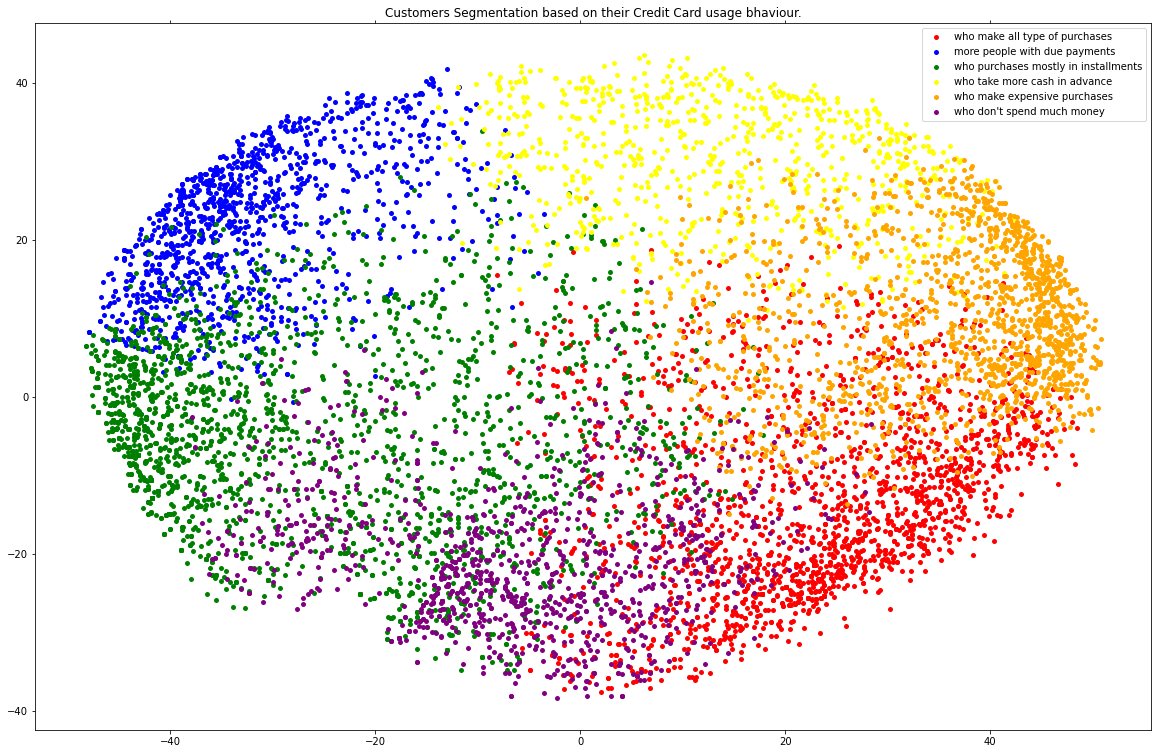

In [133]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

names = {0: 'who make all type of purchases', 
         1: 'more people with due payments', 
         2: 'who purchases mostly in installments', 
         3: 'who take more cash in advance', 
         4: 'who make expensive purchases',
         5:'who don\'t spend much money'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

In [ ]:
# 신용카드 소비패턴 분석에 의한 마케팅

# Cluster0: 고가의 구매를 하는 신용 한도가 높은 고소비자 그룹
# 가장 높은 신용한도를 가지고 있고, 가장 작은 고객 그룹
# => 로열티 은행 애플리케이션을 통해 지출을 늘리도록 할 수 있을 것 같습니다

# Cluster1: 이 그룹은 선불 현금을 더 자주 받는 그룹

# Cluster2: 돈을 많이 쓰지 않고 신용 한도가 평균 이상인 그룹, 신용카드 서비스 기간이 가장 짧습니다

# Cluster3: 모든 유형의 구매를 하는 평균에서 높은 신용 한도를 가진 그룹

# Cluster4: 신용 한도가 높고, 현금이 가장 많은 그룹
# => 이 그룹은 일반적으로 현금 서비스로 거래하는 것을 좋아하는 듯하니 현금거래가 신용카드로 반환되도록 마케팅하는 것이 좋을것같습니다.

# Cluster5: 대부분 할부로 구매하는 평균에서 높은 신용 한도까지 돈을 덜 쓰는 그룹